In [1]:
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from DRE import DeepRecursiveEmbedding

In [3]:
# Deep Recursive Embedding test code using MNIST/Fashion-MNIST datasets loaded with torchvision

transform_train = transforms.Compose([
    transforms.ToTensor(),
])
x_train = torchvision.datasets.MNIST(root='./datasets', train=True, transform=transform_train,
                                     download=True)
x_train_targets = np.int16(x_train.targets)
x_train = np.array(x_train.data).astype('float32')  # useful for GPU accelerating
x_train = x_train.reshape(x_train.shape[0], -1)

dre = DeepRecursiveEmbedding(dre_type='fc',
                             n_pre_epochs=100,
                             num_recursive_tsne_epochs=50,
                             num_recursive_umap_epochs=100,
                             learning_rate=1e-3,
                             batch_size=2500,
                             random_shuffle=False,  # for plotting with labels, set to 'False'
                             save_directory='./',
                             )
# dre.labels = x_train_targets

y = dre.fit_transform(x_train)

[DRE] Building model...
[DRE] Model loaded
[DRE] start------->  time:  Fri Oct 22 07:08:46 2021
building P matrix...
[DRE] Computed conditional probabilities for sample 1000 / 2500
[DRE] Computed conditional probabilities for sample 2000 / 2500
[DRE] Computed conditional probabilities for sample 2500 / 2500
[DRE] Mean sigma: 587.588548
[DRE] P length:  1
[DRE] Computed conditional probabilities for sample 1000 / 2500
[DRE] Computed conditional probabilities for sample 2000 / 2500
[DRE] Computed conditional probabilities for sample 2500 / 2500
[DRE] Mean sigma: 586.005143
[DRE] P length:  2
[DRE] Computed conditional probabilities for sample 1000 / 2500
[DRE] Computed conditional probabilities for sample 2000 / 2500
[DRE] Computed conditional probabilities for sample 2500 / 2500
[DRE] Mean sigma: 582.353874
[DRE] P length:  3
[DRE] Computed conditional probabilities for sample 1000 / 2500


KeyboardInterrupt: 

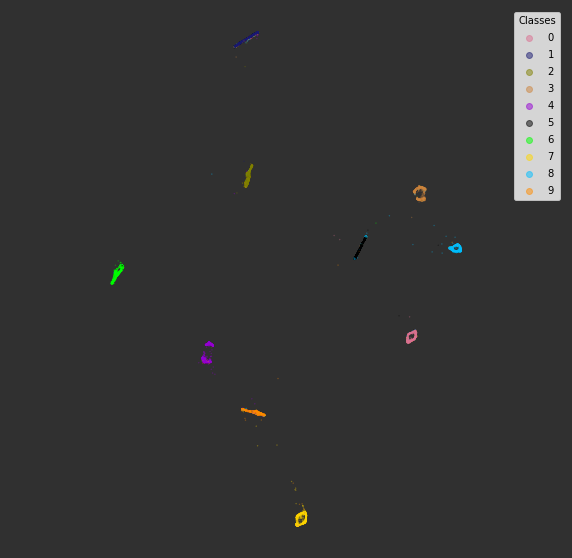

In [3]:
# Plot the result:
labels = x_train_targets
colors = ['darkorange', 'deepskyblue', 'gold', 'lime', 'k', 'darkviolet', 'peru', 'olive',
               'midnightblue',
               'palevioletred']
cmap = matplotlib.colors.ListedColormap(colors[::-1])
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('#303030')
scatter = plt.scatter(y[:, 0], y[:, 1], s=0.1, cmap=cmap, c=labels, alpha=0.5)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right')
plt.axis('equal')
plt.axis("off")
plt.show()

In [4]:
# Save the model (default selected dir: ./):
dre.save_model(save_dir='./', model_name='DRE_MNIST')  # The model is saved in '<selected dir>/DRE_model_checkpoint/'
